MNE: Resting State Processing Pipeline
======================================

Author: Hadi Zaatiti <hadi.zaatiti@nyu.edu>

In this script we will be processing data generated from the KIT-MEG for a resting state experiment.

The experiment has been conducted using the code in [Link Text](https://github.com/hzaatiti-NYU/meg-pipeline/blob/175b9f546826cd18ae8cc5ec4897bd8261952060/experiments/general/resting_state_meg.m) involving a 5 minutes eyes closed followed by a 5 minutes eyes open of the participant.

The data can be accessed at
[Data Storage](https://meg-pipeline.readthedocs.io/en/latest/4-data/2-datastorage.html) we will be using the *resting_state/sub-01* BIDS dataset

After downloading the data, be familiar with the different files in the *meg-kit* folder:

- The .con are the raw files produced by the KIT machine, has the MEG time series for each channel
- The .con that has *analysis* in their name, have already applied a filter to account for the noisy magnetic field in the MSR, the latter is measured with the magnetometers of the KIT, this file contains the filtered MEG time series for each channel
- The .mrk has the markers position from KIT
- The .fif is produced by applying *KIT2FIFF* command provided by the MNE environment from the filtered .con file and the .mrk files (Check the KIT2FIF tutorial in this documentation)
- We obtained two .fif files, one for eyes closed and one for eyes open


Import mne and set visualisations to show in the notebook

In [1]:
import os

import numpy as np
import mne
from mne.time_frequency import tfr_morlet
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Load your .fif file for eyes closed

Display the info structure from the data

In [2]:
# Set environment variables and load data

MEG_DATA = os.getenv('MEG_DATA')

CLOSED_DATA_PATH = r"resting-state\sub-01\meg-kit\sub-01_01-eyes-closed-raw.fif"
OPEN_DATA_PATH = r"resting-state\sub-01\meg-kit\sub-01_02-eyes-open-raw.fif"

CLOSED_DATASET_PATH  = os.path.join(MEG_DATA, CLOSED_DATA_PATH)
OPEN_DATASET_PATH = os.path.join(MEG_DATA, OPEN_DATA_PATH)

# Load your raw data
raw_closed = mne.io.read_raw_fif(CLOSED_DATASET_PATH, preload=True)

raw_open = mne.io.read_raw_fif(OPEN_DATASET_PATH, preload=True)

Opening raw data file C:\Users\hz3752\Box\MEG\Data\resting-state\sub-01\meg-kit\sub-01_01-eyes-closed-raw.fif...
    Range : 0 ... 321999 =      0.000 ...   321.999 secs
Ready.
Reading 0 ... 321999  =      0.000 ...   321.999 secs...
Opening raw data file C:\Users\hz3752\Box\MEG\Data\resting-state\sub-01\meg-kit\sub-01_02-eyes-open-raw.fif...
    Range : 0 ... 335999 =      0.000 ...   335.999 secs
Ready.
Reading 0 ... 335999  =      0.000 ...   335.999 secs...


In [3]:
print(raw_closed.info)

<Info | 13 non-empty values
 bads: []
 ch_names: MEG 001, MEG 002, MEG 003, MEG 004, MEG 005, MEG 006, MEG 007, ...
 chs: 207 Magnetometers, 17 Reference Magnetometers, 32 misc, 1 Stimulus
 custom_ref_applied: False
 description: New York University Abu Dhabi/224-channel MEG System (442) ...
 dev_head_t: MEG device -> head transform
 dig: 3459 items (3 Cardinal, 5 HPI, 3451 Extra)
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 kit_system_id: 442 (New York University Abu Dhabi, 2014-)
 lowpass: 500.0 Hz
 meas_date: 2024-04-19 09:05:59 UTC
 meas_id: 4 items (dict)
 nchan: 257
 projs: []
 sfreq: 1000.0 Hz
>


In [6]:
# Print Helmet and Sensors for KIT
fig = mne.viz.plot_alignment(
    raw_closed.info,
    dig=False,
    eeg=False,
    surfaces=[],
    meg=["helmet", "sensors"],
    coord_frame="meg",
)
mne.viz.set_3d_view(fig, azimuth=50, elevation=90, distance=0.5)

Using pyvistaqt 3d backend.

Getting helmet for system KIT (derived from 207 MEG channel locations)
Channel types::	mag: 207


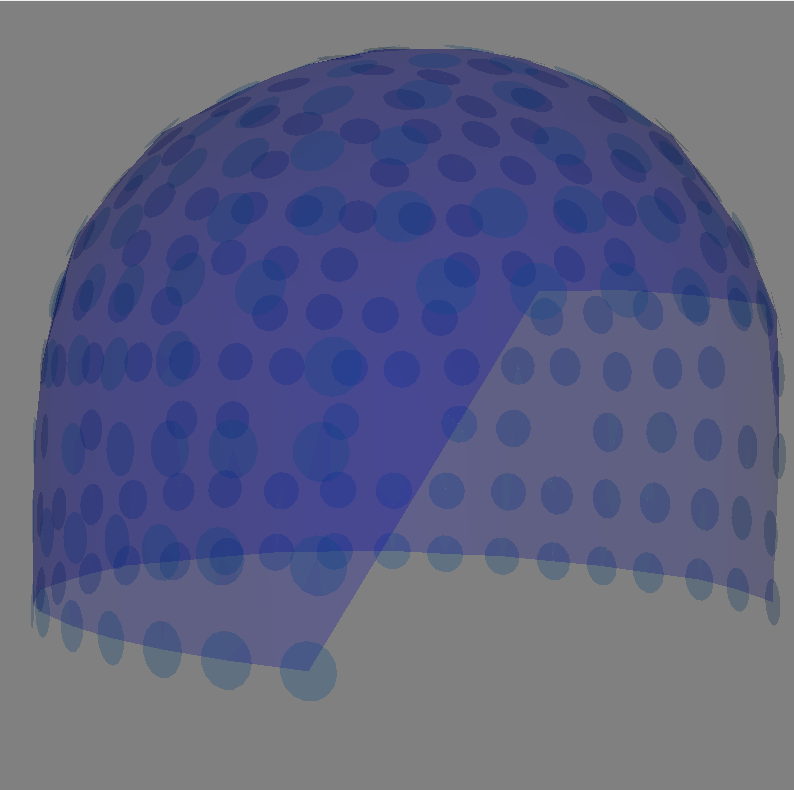

Let us plot the sensor layout of the system used in the data acquisition (KIT-MEG)

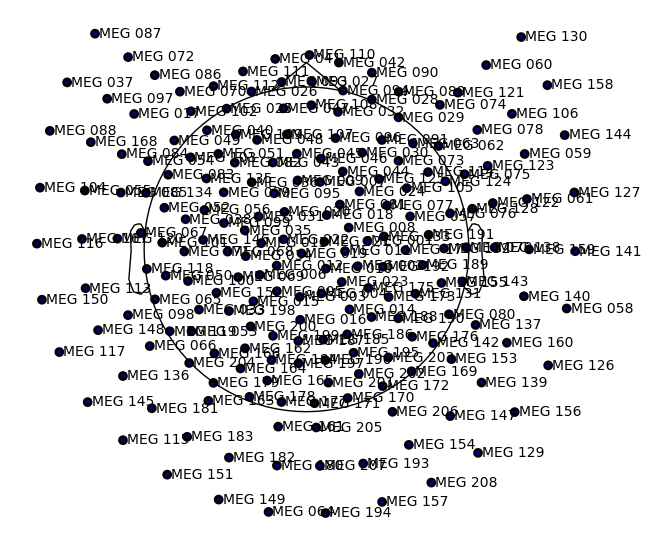

In [4]:
# For a 2D topographic plot of the sensor locations
raw_closed.plot_sensors(kind='topomap', show_names=True);

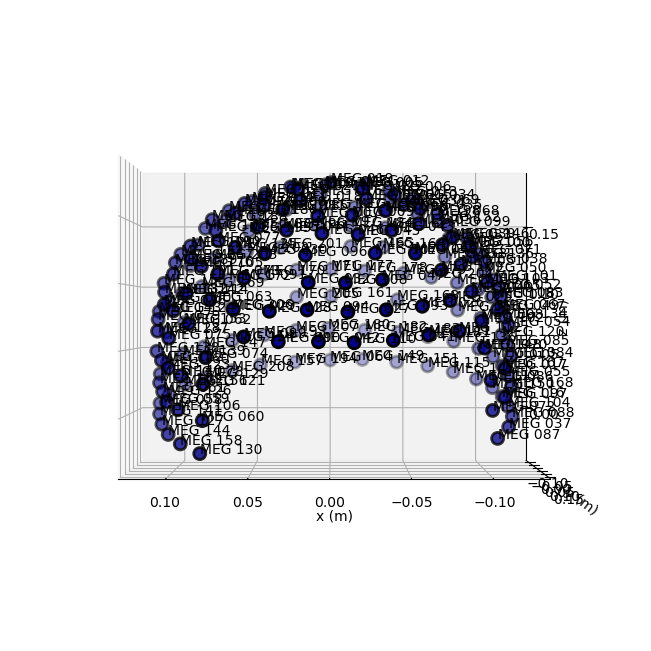

In [5]:
# For a 3D plot, you can also do:
fig = raw_closed.plot_sensors(kind='3d', show_names=True)

Let us visualise the data and plot the first 5 seconds of the data interactively

In [8]:
# Plot the first 5 seconds of the data
raw_closed.plot(start=0, duration=5)

Using qt as 2D backend.


Waiting for Loading-Thread to finish... (max. 10 sec)
Channels marked as bad:
none


You should see the following interactive window

![Data visualisation](data-visu.png "Data visualisation for 5 seconds duration")


From the above interactive window, you can mark channels as bad by visual inspection

Notice that in MNE, the channels have different types

- MEG, for our system a .fif will show `MEG 001` to `MEG 208` are of type `mag`
- MISC, for our system this will show from `MISC 001` to `MISC 032` are of type `misc`
- STIM, for our system this will show as `STI 014` are of type `stim`

Let us print the channel types from our raw data.

In [9]:
print(raw_closed.info.get_channel_types())

['mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'ref_meg', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', 'mag', '

Let us print all the channel names

In [10]:
print(raw_closed.ch_names)

['MEG 001', 'MEG 002', 'MEG 003', 'MEG 004', 'MEG 005', 'MEG 006', 'MEG 007', 'MEG 008', 'MEG 009', 'MEG 010', 'MEG 011', 'MEG 012', 'MEG 013', 'MEG 014', 'MEG 015', 'MEG 016', 'MEG 017', 'MEG 018', 'MEG 019', 'MEG 020', 'MEG 021', 'MEG 022', 'MEG 023', 'MEG 024', 'MEG 025', 'MEG 026', 'MEG 027', 'MEG 028', 'MEG 029', 'MEG 030', 'MEG 031', 'MEG 032', 'MEG 033', 'MEG 034', 'MEG 035', 'MEG 036', 'MEG 037', 'MEG 038', 'MEG 039', 'MEG 040', 'MEG 041', 'MEG 042', 'MEG 043', 'MEG 044', 'MEG 045', 'MEG 046', 'MEG 047', 'MEG 048', 'MEG 049', 'MEG 050', 'MEG 051', 'MEG 052', 'MEG 053', 'MEG 054', 'MEG 055', 'MEG 056', 'MEG 057', 'MEG 058', 'MEG 059', 'MEG 060', 'MEG 061', 'MEG 062', 'MEG 063', 'MEG 064', 'MEG 065', 'MEG 066', 'MEG 067', 'MEG 068', 'MEG 069', 'MEG 070', 'MEG 071', 'MEG 072', 'MEG 073', 'MEG 074', 'MEG 075', 'MEG 076', 'MEG 077', 'MEG 078', 'MEG 079', 'MEG 080', 'MEG 081', 'MEG 082', 'MEG 083', 'MEG 084', 'MEG 085', 'MEG 086', 'MEG 087', 'MEG 088', 'MEG 089', 'MEG 090', 'MEG 091'

Let us plot the `MISC 001` channel that contains the trigger, it is a good practice to copy the raw data before picking a specific channel since the picking operation changes 

In [13]:
channel_name = 'MISC 001'
raw_picked = raw_closed.copy().pick_channels([channel_name])
scalings = {'misc':0.1}

raw_picked.plot(scalings = scalings, duration=315, start=0, n_channels=1)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Channels marked as bad:
none


You should see the trigger channel going from 0 to 1 over a period of 5 minutes, corresponding to the eyes closed period as in the following image.
The `AU` unit on the Y-axis correspond to arbitrary unit.

![Trigger visualisation](eye-closed-misc001.png "Visualisation of the trigger signal from 0 to 5V over 5 minutes of eyes closed, resting state period")

Note the times of beginning and end of the trigger as respectively 11 seconds and 310 seconds, let's do FFT on the data for this time

In [15]:
crop_raw_closed = raw_closed.copy()
crop_raw_closed.crop(100, 250)

Measurement date,"April 19, 2024 09:05:59 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,3459 points
Good channels,"207 Magnetometers, 17 Reference Magnetometers, 32 misc, 1 Stimulus"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,1000.00 Hz
Highpass,0.00 Hz
Lowpass,500.00 Hz


In [16]:
crop_raw_open = raw_open.copy()
crop_raw_open.crop(100, 250)

Measurement date,"April 19, 2024 09:12:37 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,3459 points
Good channels,"207 Magnetometers, 17 Reference Magnetometers, 32 misc, 1 Stimulus"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,1000.00 Hz
Highpass,0.00 Hz
Lowpass,500.00 Hz


In [17]:
# Define frequencies of interest
frequencies = np.arange(1, 51, 1)  # Frequencies from 1 to 50 Hz

# Define the number of cycles in each frequency
n_cycles = frequencies / 2.  # Different number of cycles per frequency

In [18]:
# Define the duration of each epoch (in seconds)
epoch_duration = 2  # 2 sec

epochs_closed = mne.make_fixed_length_epochs(crop_raw_closed, duration=epoch_duration, preload=True)
epochs_open = mne.make_fixed_length_epochs(crop_raw_open, duration=epoch_duration, preload=True)

Not setting metadata
75 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 75 events and 2000 original time points ...
0 bad epochs dropped
Not setting metadata
75 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 75 events and 2000 original time points ...
0 bad epochs dropped


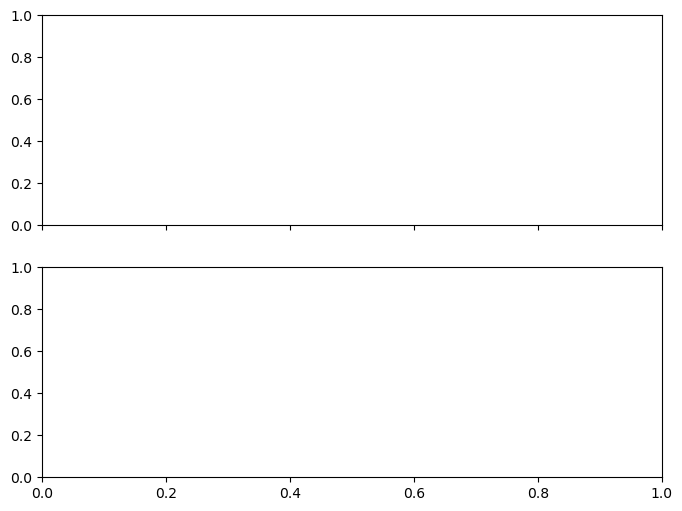

In [22]:
# Plot PSD for cleaned data with labels
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().


C:\Users\hz3752\AppData\Local\Temp\ipykernel_2872\3760958086.py:1: UserWarning: Zero value in spectrum for channels MEG 041, MEG 056, MEG 059, MEG 067, MEG 102, MEG 148, MEG 183
  epochs_closed.plot_psd(fmin=1, fmax=40, ax=ax1, color='blue', show=False, average=True, spatial_colors=False, line_alpha=0.5, dB=True, xscale='log')
C:\Users\hz3752\AppData\Local\Temp\ipykernel_2872\3760958086.py:1: UserWarning: Infinite value in PSD for channels MEG 041, MEG 056, MEG 059, MEG 067, MEG 102, MEG 148, MEG 183.
These channels might be dead.
  epochs_closed.plot_psd(fmin=1, fmax=40, ax=ax1, color='blue', show=False, average=True, spatial_colors=False, line_alpha=0.5, dB=True, xscale='log')


    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs...


C:\Users\hz3752\AppData\Local\Temp\ipykernel_2872\3760958086.py:2: UserWarning: Zero value in spectrum for channels MEG 041, MEG 056, MEG 059, MEG 067, MEG 102, MEG 148, MEG 157, MEG 183
  epochs_open.plot_psd(fmin=1, fmax=40, ax=ax2, color='blue', show=False, average=True, spatial_colors=False, line_alpha=0.5, dB=True, xscale='log')
C:\Users\hz3752\AppData\Local\Temp\ipykernel_2872\3760958086.py:2: UserWarning: Infinite value in PSD for channels MEG 041, MEG 056, MEG 059, MEG 067, MEG 102, MEG 148, MEG 183.
These channels might be dead.
  epochs_open.plot_psd(fmin=1, fmax=40, ax=ax2, color='blue', show=False, average=True, spatial_colors=False, line_alpha=0.5, dB=True, xscale='log')


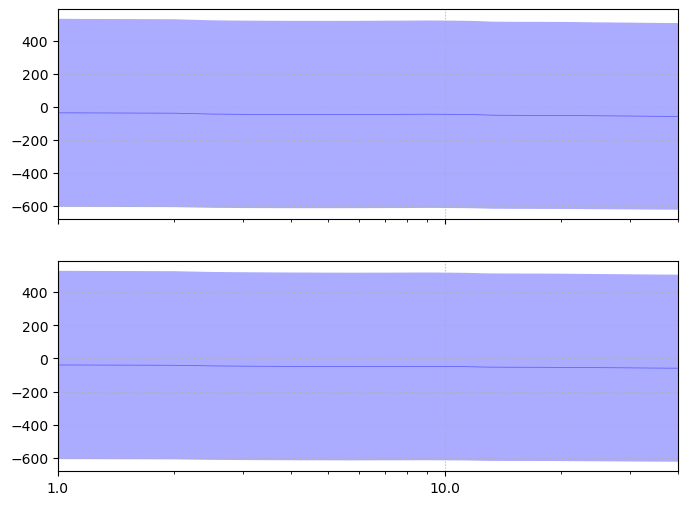

In [23]:
epochs_closed.plot_psd(fmin=1, fmax=40, ax=ax1, color='blue', show=False, average=True, spatial_colors=False, line_alpha=0.5, dB=True, xscale='log')
epochs_open.plot_psd(fmin=1, fmax=40, ax=ax2, color='blue', show=False, average=True, spatial_colors=False, line_alpha=0.5, dB=True, xscale='log')

In [ ]:
# Compute the power spectral density (PSD) using Morlet wavelets
freqs = np.logspace(*np.log10([1, 40]), num=50)  # Define frequency range

n_cycles = freqs / 2

power_closed = tfr_morlet(epochs_closed, freqs=freqs, n_cycles=n_cycles, return_itc=False, average=True)


# Plot the PSD
fig, ax = plt.subplots(figsize=(10, 6))
power_closed.plot([0], baseline=None, mode='logratio', title='Average power', axes=ax, show=False)

plt.show()

NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   18.3s


In [13]:
data, times = raw[:]
wsize=256
fourier_transform_data = mne.time_frequency.stft(data, wsize=wsize)

Number of frequencies: 129
Number of time steps: 2516


Sampling frequency 1000.0


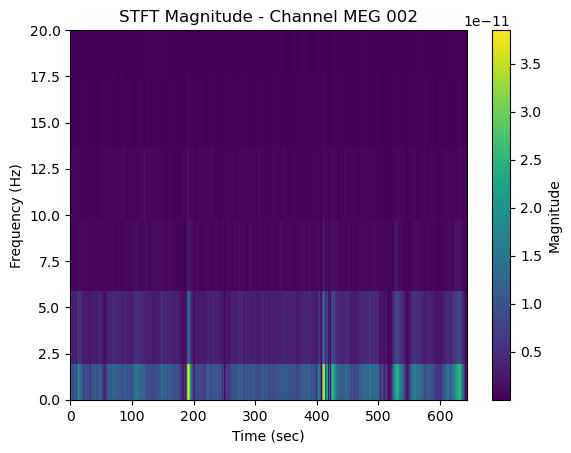

In [14]:
%matplotlib inline
# Select the channel index you're interested in
channel_index = 1
import numpy as np
# Compute magnitude of STFT results
magnitude = np.abs(fourier_transform_data[channel_index])

# Prepare frequencies and time vectors for plotting
sfreq = raw.info['sfreq']
print('Sampling frequency', sfreq)
frequencies = np.linspace(0, sfreq / 2, magnitude.shape[0], endpoint=True)
t_secs = np.arange(magnitude.shape[1]) * (wsize / sfreq)

# Plotting
plt.figure()
plt.pcolormesh(t_secs, frequencies, magnitude, shading='auto')
plt.title(f'STFT Magnitude - Channel {raw.info["ch_names"][channel_index]}')
plt.ylabel('Frequency (Hz)')
plt.ylim(0, 20)
plt.xlabel('Time (sec)')
plt.colorbar(label='Magnitude')
plt.show()

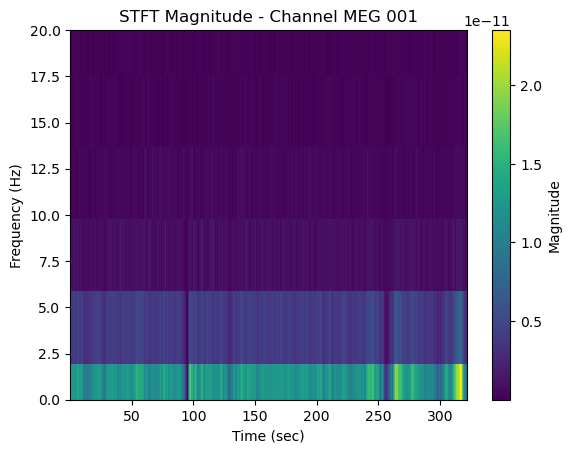

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'stft_result' from previous STFT calculation and 'raw' object are available

# Parameters
channel_index = 0
sfreq = raw.info['sfreq']
wsize = 256  # Window size used in STFT
hop_size = int(wsize / 2)  # 50% overlap

# Compute magnitude of STFT results
magnitude = np.abs(fourier_transform_data[channel_index])

# Prepare frequencies and time vectors for plotting
frequencies = np.linspace(0, sfreq / 2, magnitude.shape[0], endpoint=True)

# Calculate correct start times for each window and then add half the window size to center it
start_times = np.arange(0, magnitude.shape[1] * hop_size, hop_size)
t_secs = (start_times + wsize / 2) / sfreq

# Limit frequency data to 100 Hz
freq_limit = 20
freq_indices = frequencies <= freq_limit
frequencies = frequencies[freq_indices]
magnitude = magnitude[freq_indices, :]

# Plotting
plt.figure()
plt.pcolormesh(t_secs, frequencies, magnitude, shading='auto')
plt.title(f'STFT Magnitude - Channel {raw.info["ch_names"][channel_index]}')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.ylim(0, freq_limit)  # Set y-axis limit to 100 Hz
plt.colorbar(label='Magnitude')
plt.show()